# Hands-on Project: Sale data analysis
<a id = "2.1"></a>
## 1.1 About Dataset

**Context**:</br>
Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.

**Content**:</br>
* `Order ID` - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
* `Product` - The product that have been sold.
* `Quantity Ordered` - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
* `Price Each` - The price of each products.
* `Order Date` - This is the date the customer is requesting the order be shipped.
* `Purchase Address` - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

**`Question`**: **`What was the best month for sales? How much was earned that month?`**

## 2.2. Prepared and Data Extraction


In [37]:
# import library nesscessary
import pandas as pd
import numpy as np
import matplotlib as plt



### 2.2.2 Data Extraction

In [9]:
df = pd.read_csv("/content/sales_data.csv", parse_dates=["Order Date"])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaT,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186490,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186491,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186492,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186493,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


<a id = "2.3"></a>
## 2.3 Data cleaning & exploration

<a id = "2.3.1"></a>
### 2.3.1 Understand data  
we can view some basic about DataFrame using mothod info() 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186495 entries, 0 to 186494
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  float64       
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 8.5+ MB


In [8]:
df.describe() # xem mô tả

,Order ID,Quantity Ordered,Price Each
count,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735
std,51512.737110,0.442793,332.731330
min,141234.000000,1.000000,2.990000
25%,185831.250000,1.000000,11.950000
50%,230367.500000,1.000000,14.950000
75%,275035.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [11]:
df.head() #method to view the first rows of data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaT,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
df.tail() # method to view the last few rows of data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186490,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186491,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186492,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186493,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
186494,259357.0,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


In [14]:
df.sample(5) # view 5 rows random

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
57405,152415.0,AA Batteries (4-pack),1.0,3.84,2019-02-04 11:08:00,"294 Cherry St, Dallas, TX 75001"
110886,167575.0,AA Batteries (4-pack),1.0,3.84,2019-03-20 11:20:00,"596 Forest St, San Francisco, CA 94016"
179445,252588.0,Macbook Pro Laptop,1.0,1700.00,2019-09-26 11:36:00,"573 Johnson St, Boston, MA 02215"
42122,306924.0,Lightning Charging Cable,1.0,14.95,2019-12-02 20:11:00,"412 Cedar St, Seattle, WA 98101"
140503,282301.0,iPhone,1.0,700.00,2019-11-02 12:03:00,"969 Forest St, San Francisco, CA 94016"


In [17]:
df.columns #the collumns property contains the list of collum with dataFrame 

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [19]:
df['Product'].unique() # get info of all product

array(['USB-C Charging Cable', nan, 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

<a id = "2.3.2"></a>
### 2.3.2 Clean up the data!

**Drop rows of NAN**  
We using the .isna() to detect missing values

In [21]:
df.isna().sum() # datas wrong about format and

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [25]:
# delete them
df = df.dropna(how = 'any')

In [26]:
# test again and continue using method .isna()
df.isna().sum() # data cleaned

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

<a id = "2.4"></a>
## 2.4 Data Wrangling
We can now extract different parts of the datetime into separate day, month, year... examlple: dt.month, dt.year...

In [28]:
df['Order Date'].dt.month # return month of columns get from columns Order Date

0         4
2         4
3         4
4         4
5         4
         ..
186490    9
186491    9
186492    9
186493    9
186494    9
Name: Order Date, Length: 185950, dtype: int64

In [32]:
# Add Month columns
df['Month'] = df['Order Date'].dt.month # trích xuất month trong 'Order Date' sau đó gắn vào cột month vừa tạo
df.sample(5)

<ipython-input-32-5bc5b8f9c8cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].dt.month # trích xuất month trong 'Order Date' sau đó gắn vào cột month vừa tạo


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
114068,170631.0,AAA Batteries (4-pack),1.0,2.99,2019-03-31 23:35:00,"59 River St, Los Angeles, CA 90001",3
15156,191042.0,Vareebadd Phone,1.0,400.00,2019-04-01 10:36:00,"716 Lincoln St, San Francisco, CA 94016",4
156992,261758.0,27in FHD Monitor,1.0,149.99,2019-10-31 13:19:00,"992 Madison St, Atlanta, GA 30301",10
27089,245044.0,AA Batteries (4-pack),1.0,3.84,2019-08-22 15:46:00,"21 Walnut St, Los Angeles, CA 90001",8
63006,157762.0,AAA Batteries (4-pack),1.0,2.99,2019-02-01 11:39:00,"189 Lincoln St, Boston, MA 02215",2


In [34]:
# Add Sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] #sản lượng * doanh thu
df.sample(8)

<ipython-input-34-eaf147806c08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each'] #sản lượng * doanh thu


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
77482,223250.0,AAA Batteries (4-pack),2.0,2.99,2019-07-15 17:44:00,"823 13th St, New York City, NY 10001",7,5.98
169586,273797.0,Apple Airpods Headphones,1.0,150.00,2019-10-10 16:28:00,"985 Park St, Portland, OR 97035",10,150.00
42318,307112.0,Apple Airpods Headphones,1.0,150.00,2019-12-02 12:43:00,"549 Spruce St, Dallas, TX 75001",12,150.00
142503,284211.0,Lightning Charging Cable,1.0,14.95,2019-11-30 16:59:00,"390 Adams St, Atlanta, GA 30301",11,14.95
41227,306072.0,27in FHD Monitor,1.0,149.99,2019-12-11 11:58:00,"156 Jefferson St, Dallas, TX 75001",12,149.99
118488,174859.0,Lightning Charging Cable,1.0,14.95,2019-03-13 20:49:00,"167 Elm St, San Francisco, CA 94016",3,14.95
45738,310404.0,Lightning Charging Cable,1.0,14.95,2019-12-11 14:50:00,"742 Jefferson St, Atlanta, GA 30301",12,14.95
182644,255648.0,AA Batteries (4-pack),1.0,3.84,2019-09-10 13:05:00,"672 6th St, Dallas, TX 75001",9,3.84


#### `Split-apply-combine` for describing group operations.
* In the first stage of the process, data contained in a pandas object, whether a Series, DataFrame, or otherwise, is split into groups based on one or more keys that you provide. The splitting is performed on a particular axis of an object. For example, a DataFrame can be grouped on its rows (axis=0) or its columns (axis=1). 
* Once this is done, a function is applied to each group, producing a new value.
* Finally, the results of all those function applications are combined into a result object. 

In [35]:
total_month_df = df.groupby(['Month']).agg({"Sales":"sum"}) # show Price Each month
total_month_df

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


**Từ số liệu trên cố thể khẳng định rằng tháng 12 có doanh thu cao nhất**

<a id = "2.5"></a>
## 2.5 Visualization  
- We generally use a library like mathplotlib or seaborn plot graph within. However, Pandas DataFrames & Series provide a handy .plot method for quick and easy plotting  
- Show result format bar is better


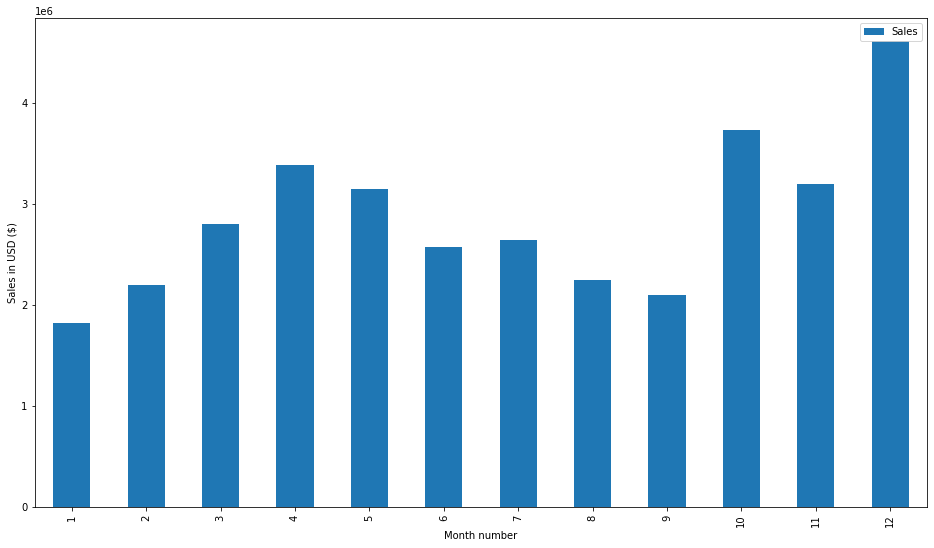

In [39]:
total_month_df.plot(kind = "bar", figsize = (16, 9), xlabel = "Month number", ylabel = "Sales in USD ($)", colormap = "tab10");

In addition, we can show result is a plot **Poe** or **Chart**. However, in case data show follow months. So use plot **Bar** is most suitable.